# Independent Explorations 1

## 1. Importing data set

## 2. Creating a new column for the total number of billionaires in each country
### * Created a new data frame for country names and totals

## 3. Looking for outliers by comparing variables against themselves in scatterplots
### * Looking at outliers to see what values they contain

## 4. Looking for correlations between variables by creating regression charts.
### * Excluding outliers to see how regression lines are impacted
### * Looking deeper into GDP as corrlated with numbers of billionaires in each country

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

In [2]:
# To display charts in the notebook without calling them

%matplotlib inline

In [3]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6\Data'

In [4]:
# Importing data set

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'billionaires_cleaned.csv'), index_col = False)

In [5]:
# Removing the limit to columns displayed

pd.options.display.max_columns = None

In [6]:
df.head()

,Unnamed: 0,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,country_total,industries_total
0,0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,35.0,266
1,1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,73
2,2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,314
3,3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,314
4,4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,372


In [8]:
df.groupby('country')

In [9]:
# Create a new column with the count of records for each country

df['total_records'] = df.groupby('country')['country'].transform('count')

# This cell was accidentally run twice, creating two 'total_records' columns.

In [11]:
# Renaming "total_records" to be more intuitive

df.rename(columns = {'total_records' : 'country_total'}, inplace = True)

# This cell was accidentally run twice, renaming both 'total_records' duplicates.

In [12]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,country_total,industries_total,country_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,35.0,266,35.0
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,73,754.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,314,754.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,314,754.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,754.0,372,754.0


In [24]:
# Deleting the duplicate column

df.drop(columns = 'country_total', inplace = True)

In [26]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372


In [28]:
# That accidentally deleted both columns. So I'll remake the 'country_total' column now.

# Create a new column with the count of records for each country

df['country_total'] = df.groupby('country')['country'].transform('count')

In [29]:
df[['country', 'country_total']].head()

,country,country_total
0,France,35.0
1,United States,754.0
2,United States,754.0
3,United States,754.0
4,United States,754.0


In [30]:
# Create a new data frame with unique country names and their  totals

countries_df = df[['country', 'country_total']].drop_duplicates()

In [31]:
countries_df.head(20)

,country,country_total
0,France,35.0
1,United States,754.0
7,Mexico,13.0
8,India,157.0
12,Spain,25.0
14,China,523.0
21,Canada,42.0
26,Germany,102.0
28,Switzerland,78.0
29,Belgium,3.0


In [16]:
# Exporting countries_df data frame as csv

countries_df.to_csv(os.path.join(path, 'Prepared Data', 'countries.csv'))

<Axes: xlabel='final_worth', ylabel='final_worth'>

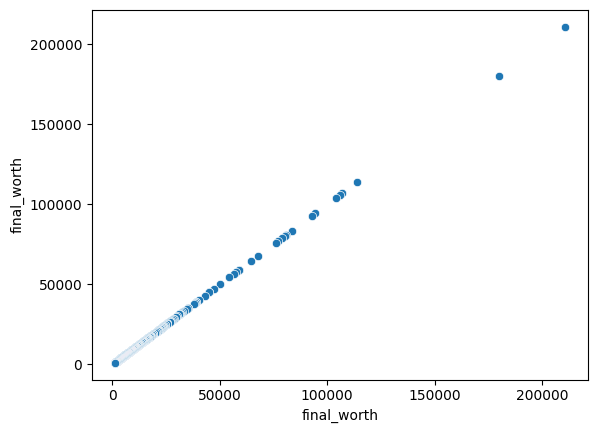

In [17]:
# Looking for outliers by comparing variables against themselves

sns.scatterplot(x = 'final_worth', y = 'final_worth', data = df)

### There are 2 billionaires who are outliers

<Axes: xlabel='country_total', ylabel='country_total'>

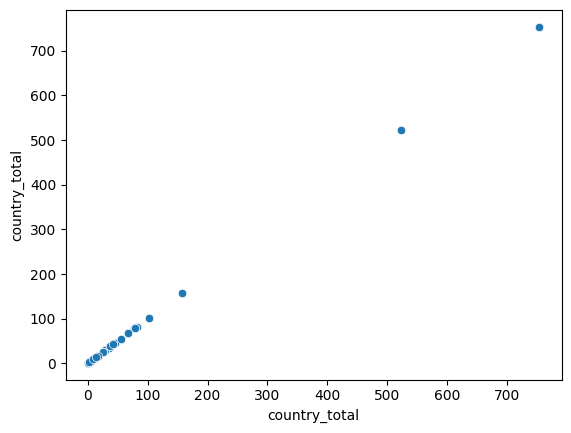

In [32]:
sns.scatterplot(x = 'country_total', y = 'country_total', data = df)

### Two countries have many  more billionaires than other countries.

In [33]:
# Which two countries have more billionaires than others?

df.loc[df['country_total'] > 500]

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,73,754.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,314,754.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,314,754.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,372,754.0
5,6,104000,Bill Gates,67.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,314,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2540,1000,Yi Xianzhong & family,63.0,China,Guangzhou,Healthcare,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.86166,104.195397,201,523.0
2635,2540,1000,Yu Rong,51.0,China,Shanghai,Healthcare,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.86166,104.195397,201,523.0
2636,2540,1000,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Food & Beverage,United States,False,M,Pennsylvania,Northeast,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.09024,-95.712891,212,754.0
2637,2540,1000,Zhang Gongyun,60.0,China,Gaomi,Manufacturing,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.86166,104.195397,324,523.0


### The two countries with the most billionaires are the US (754) and China (523).

<Axes: xlabel='industries', ylabel='industries'>

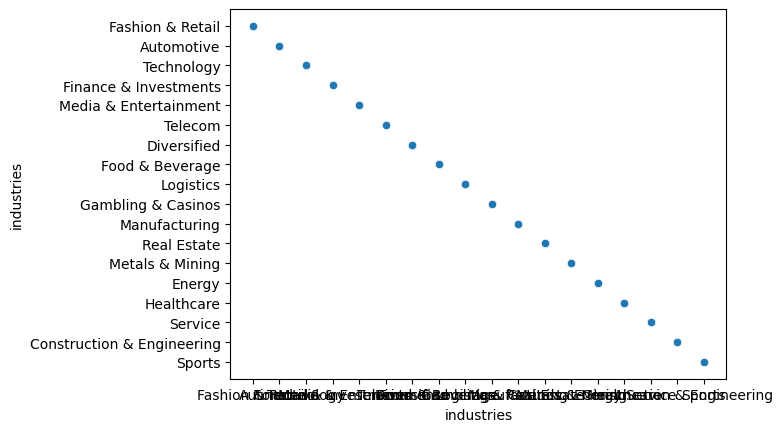

In [34]:
sns.scatterplot(x = 'industries', y = 'industries', data = df)

In [35]:
# Create a new column with the count of records for each industry

df['industries_total'] = df.groupby('industries')['industries'].transform('count')

In [36]:
df[['industries', 'industries_total']].head(50)

,industries,industries_total
0,Fashion & Retail,266
1,Automotive,73
2,Technology,314
3,Technology,314
4,Finance & Investments,372
5,Technology,314
6,Media & Entertainment,91
7,Telecom,31
8,Diversified,187
9,Technology,314


<Axes: xlabel='industries_total', ylabel='industries_total'>

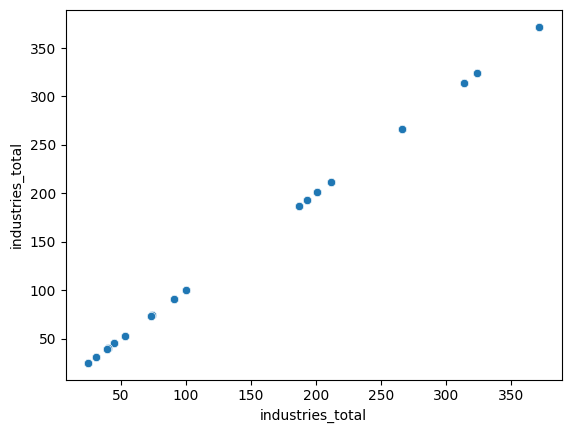

In [37]:
sns.scatterplot(x = 'industries_total', y = 'industries_total', data = df)

In [38]:
# What are the top 4 industries for billionaires?

df.loc[df['industries_total'] > 250]

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,6.705989e+07,46.227638,2.213749,266,35.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,314,754.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,314,754.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,372,754.0
5,6,104000,Bill Gates,67.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,314,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2540,1000,Franziska Wuerbser,35.0,NaN,NaN,Manufacturing,Germany,False,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324,NaN
2631,2540,1000,Xie Bingzheng & family,54.0,China,Guangzhou,Fashion & Retail,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.861660,104.195397,266,523.0
2632,2540,1000,Xu Gang,59.0,China,Jiaozuo,Manufacturing,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.861660,104.195397,324,523.0
2633,2540,1000,Yan Junxu,53.0,China,Taicang,Manufacturing,China,True,M,NaN,NaN,125.08,2.9,1.991000e+13,50.6,100.2,77.0,59.2,1.397715e+09,35.861660,104.195397,324,523.0


### The top 4 industries for billionaires are Fashon & Retail, Technology, Finance & Investments, and Manufacturing.

<Axes: xlabel='self_made', ylabel='self_made'>

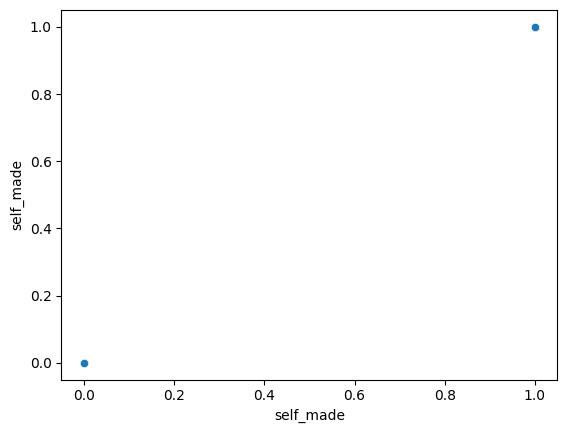

In [39]:
sns.scatterplot(x = 'self_made', y = 'self_made', data = df)

In [40]:
# Which dot is which? Is self-made higher or lower than inherited wealth?

df.loc[df['self_made'] < 0.2]

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,6.705989e+07,46.227638,2.213749,266,35.0
8,9,83400,Mukesh Ambani,65.0,India,Mumbai,Diversified,India,False,M,NaN,NaN,180.44,7.7,2.611000e+12,28.1,113.0,69.4,49.7,1.366418e+09,20.593684,78.962880,187,157.0
10,11,80500,Francoise Bettencourt Meyers & family,69.0,France,Paris,Fashion & Retail,France,False,F,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,6.705989e+07,46.227638,2.213749,266,35.0
16,17,59000,Charles Koch & family,87.0,United States,Wichita,Diversified,United States,False,M,Kansas,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,187,754.0
17,17,59000,Julia Koch & family,60.0,United States,New York,Diversified,United States,False,F,New York,Northeast,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,187,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2540,1000,Wijono Tanoko,70.0,Indonesia,Surabaya,Manufacturing,Indonesia,False,M,NaN,NaN,151.18,3.0,1.119191e+12,36.3,106.4,71.5,30.1,2.702039e+08,-0.789275,113.921327,324,25.0
2619,2540,1000,Haryanto Tjiptodihardjo,59.0,Indonesia,Jakarta,Manufacturing,Indonesia,False,M,NaN,NaN,151.18,3.0,1.119191e+12,36.3,106.4,71.5,30.1,2.702039e+08,-0.789275,113.921327,324,25.0
2630,2540,1000,Franziska Wuerbser,35.0,NaN,NaN,Manufacturing,Germany,False,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324,NaN
2636,2540,1000,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Food & Beverage,United States,False,M,Pennsylvania,Northeast,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,3.282395e+08,37.090240,-95.712891,212,754.0


### The vast majority of billionaires are self-made.

<Axes: xlabel='gender', ylabel='gender'>

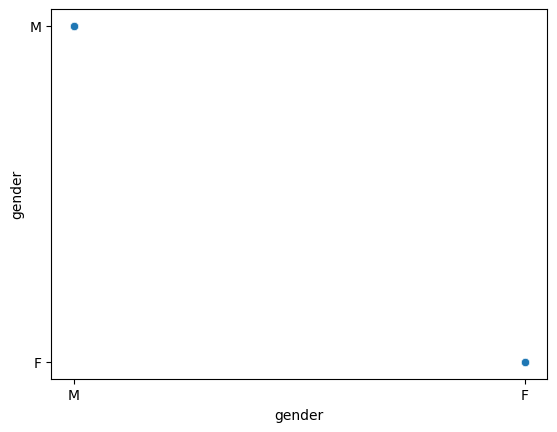

In [41]:
sns.scatterplot(x = 'gender', y = 'gender', data = df)

### There are many more male billionaires than female billionaires.

<Axes: xlabel='state', ylabel='state'>

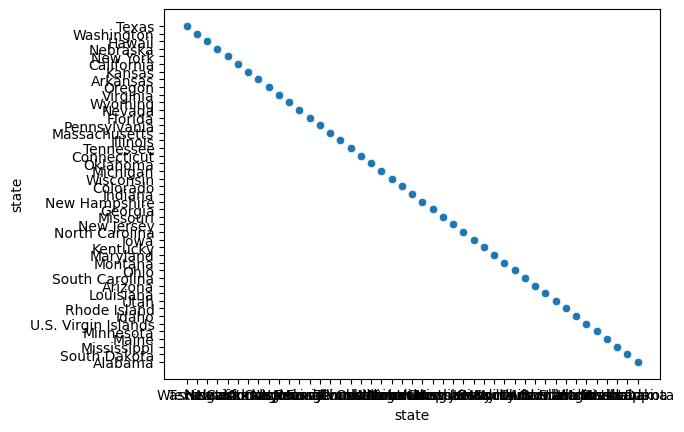

In [42]:
sns.scatterplot(x = 'state', y = 'state', data = df)

### In the US, Texas has the largest number of billionaires.

<Axes: xlabel='state_region', ylabel='state_region'>

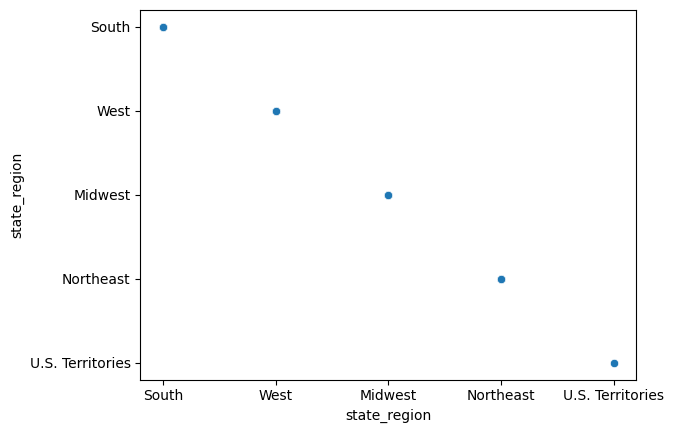

In [43]:
sns.scatterplot(x = 'state_region', y = 'state_region', data = df)

### In the US, there are more billionaires in the South.

<Axes: xlabel='cpi_country', ylabel='cpi_country'>

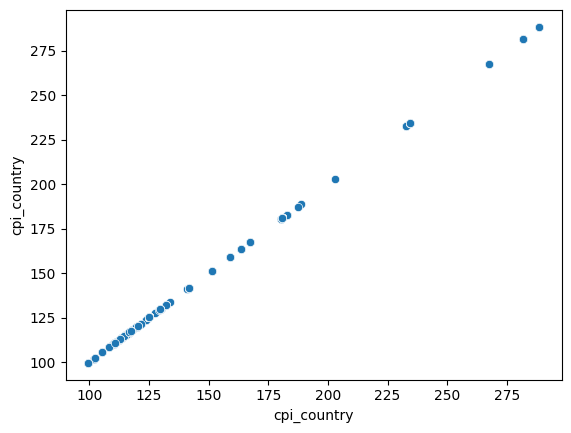

In [44]:
sns.scatterplot(x = 'cpi_country', y = 'cpi_country', data = df)

### There are more billionaires in countries with lower CPI. What are the countries represented by the three dots at the high end of the CPI?

In [45]:
df['country'].loc[df['cpi_country'] > 250]

124     Nigeria
250     Nigeria
309       Egypt
417     Nigeria
444     Ukraine
894       Egypt
1487    Ukraine
1961      Egypt
2084    Ukraine
2202      Egypt
2256    Ukraine
2411    Ukraine
2590    Ukraine
Name: country, dtype: object

### The three countries containing billionaires with the highest CPI are Nigeria, Egypt and Ukraine.

<Axes: xlabel='cpi_change_country', ylabel='cpi_change_country'>

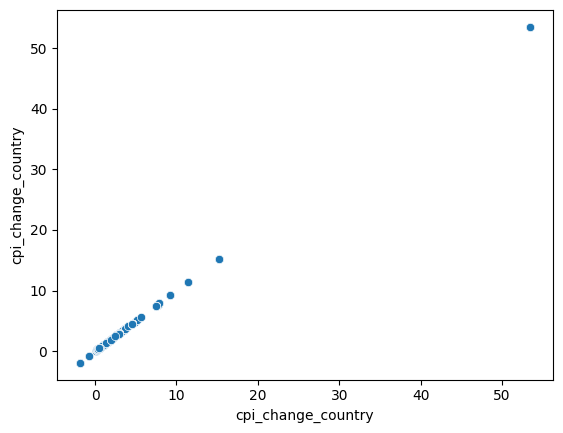

In [46]:
sns.scatterplot(x = 'cpi_change_country', y = 'cpi_change_country', data = df)

In [47]:
df['country'].loc[df['cpi_change_country'] > 20]

554     Argentina
1054    Argentina
1596    Argentina
2156    Argentina
Name: country, dtype: object

### Argentina has the highest change in the consumer price index since the last time the CPI was calibrated.

<Axes: xlabel='tertiary_ed_enroll', ylabel='tertiary_ed_enroll'>

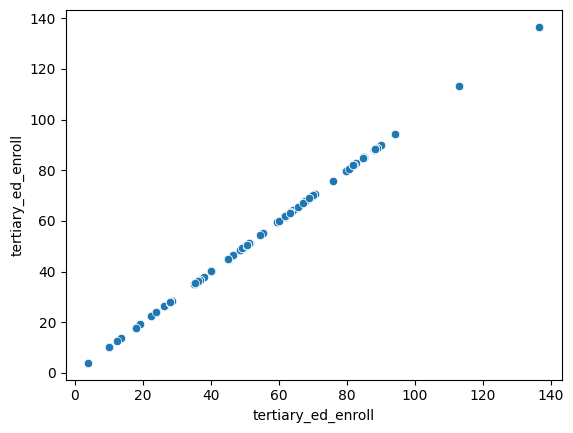

In [48]:
sns.scatterplot(x ='tertiary_ed_enroll', y='tertiary_ed_enroll', data = df)

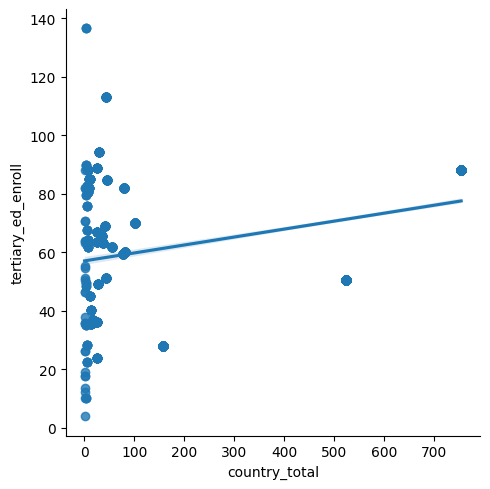

In [49]:
# I want to see if there is a correlation between the number of billionaires in a country and the 
# tertiary eduation enrollment in a country.

sns.lmplot(x = 'country_total', y = 'tertiary_ed_enroll', data = df)

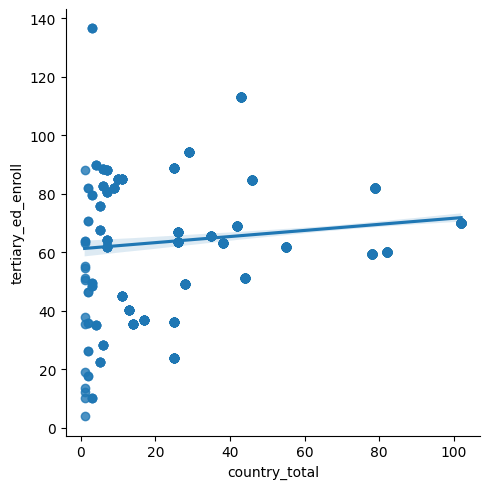

In [50]:
# What happens if we remove the three big outliers?

# Filter the data frame to exclude 'country_total' numbers over 140
filtered_df = df[df['country_total'] <= 140]

# Create the lmplot with the filtered data frame
sns.lmplot(x='country_total', y='tertiary_ed_enroll', data=filtered_df)


### There is a weakly positive correlation, but most of the data points are not near the regression line. 

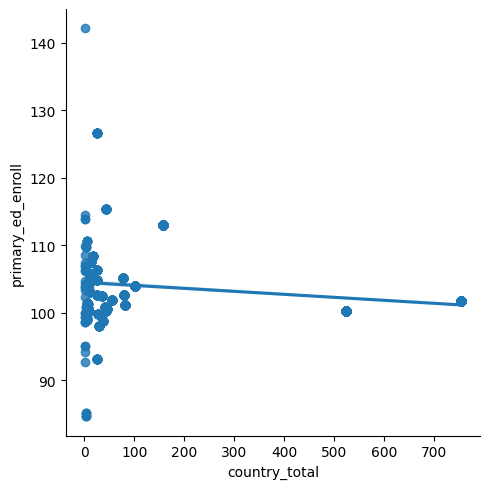

In [51]:
# I want to see if there is a correlation between the number of billionaires in a country and the 
# primary eduation enrollment in a country.

sns.lmplot(x = 'country_total', y = 'primary_ed_enroll', data = df)

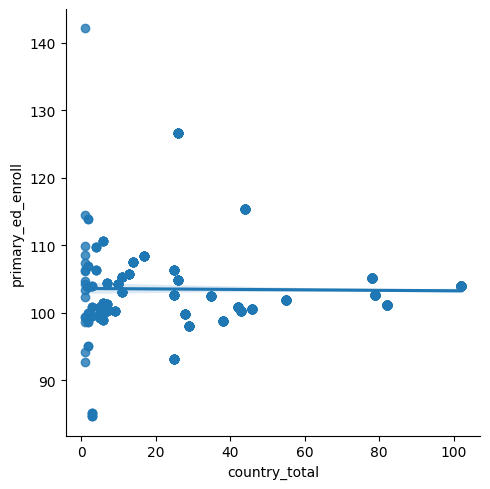

In [52]:
# What happens if we remove the three big outliers?

sns.lmplot(x='country_total', y='primary_ed_enroll', data=filtered_df)

### There is almost zero correlation between billionaires in a country and that country's primary education enrollment.
### I had expected to see a relationship between numbers of billionaires in a country as compared to the education enrollment levels in that country. But that doesn't seem to be the case.
### I will next see if there is any correlation between education enrollment levels in a country and a billionaire's final worth in that country.

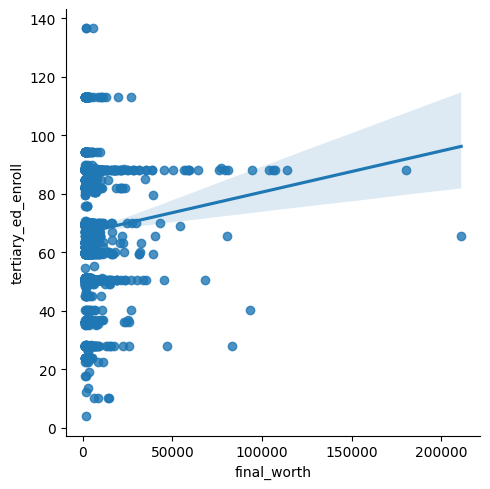

In [53]:
# I want to see if there is a correlation between the final worth of billionaires in a country and the 
# tertiary eduation enrollment in a country.

sns.lmplot(x = 'final_worth', y = 'tertiary_ed_enroll', data = df)

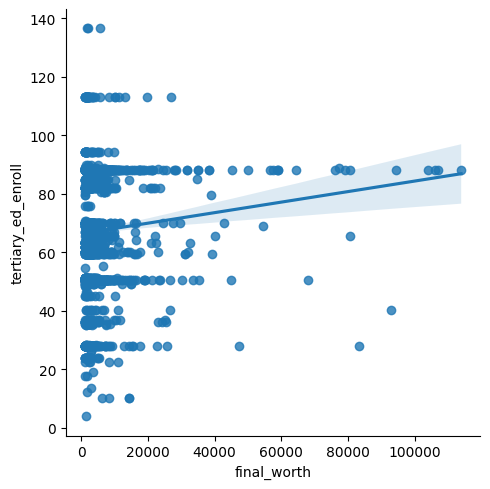

In [54]:
# What happens when I remove the two biggest final worth outliers?

# Filter the data frame to exclude 'final_worth' numbers over 150000
filtered_df = df[df['final_worth'] <= 150000]

sns.lmplot(x = 'final_worth', y = 'tertiary_ed_enroll', data = filtered_df)

### There is a positive correlation between tertiary enrollment and final worth, but most of the data points are very far from the regression line.

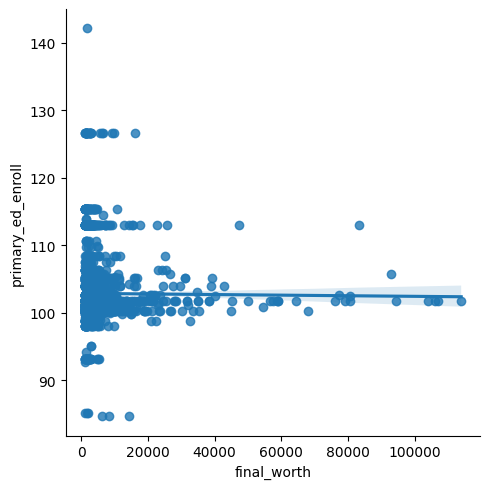

In [55]:
# I want to see if there is a correlation between the final worth of billionaires in a country and the 
# primary eduation enrollment in a country.

sns.lmplot(x = 'final_worth', y = 'primary_ed_enroll', data = filtered_df)

### There is no correlation between a billionaire's final worth and the primary education enrollment levels in their country. I will focus now on questions that do not include education enrollment numbers because this doesn't seem like a promising path.

### I will continue to explore variables against themselves to look for outliers.

<Axes: xlabel='life_expectancy_country', ylabel='life_expectancy_country'>

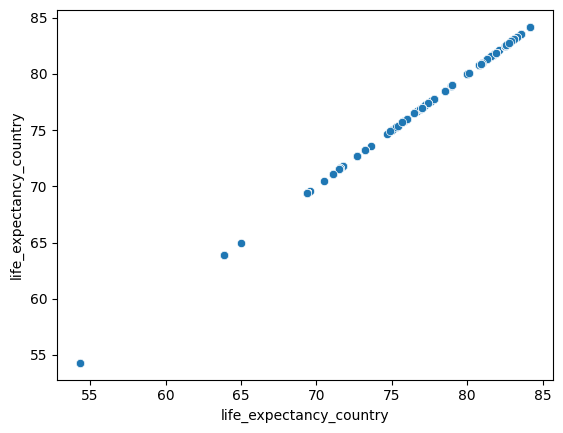

In [56]:
# Scatterplot for life_expectancy vs life_expectancy

sns.scatterplot(x = 'life_expectancy_country', y = 'life_expectancy_country', data = df)

In [57]:
# What countries do the very low life expectancies come from?

df['country'].loc[df['life_expectancy_country'] < 67]

124          Nigeria
157     South Africa
242     South Africa
250          Nigeria
417          Nigeria
1139    South Africa
1274    South Africa
1925        Tanzania
2596    South Africa
Name: country, dtype: object

### The very low life expectancies come from Nigeria, South Africa, and Tanzania. 

### Now I want to see how life expectancy is correlated with the total number of billionaires in a country and with the final worth of the billionaires.

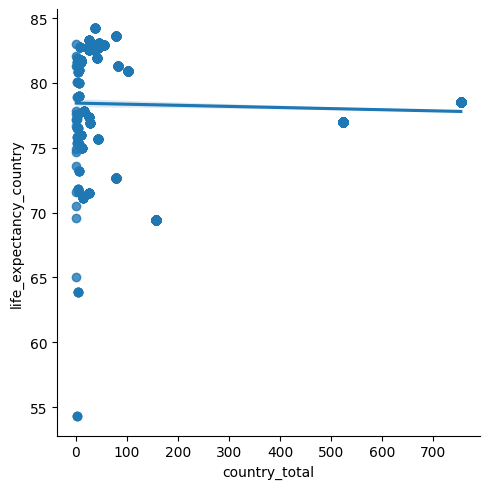

In [58]:
sns.lmplot(x = 'country_total', y = 'life_expectancy_country', data = df)

In [59]:
# What happens if we remove the 3 outliers for country_total and 3 outliers for life expectancy?

# Filter the data frame to exclude 'country_total' numbers over 140 and 'life_expectancy_country' numbers under 67
filtered_df = df[(df['country_total'] <= 140) & (df['life_expectancy_country'] >= 67)]

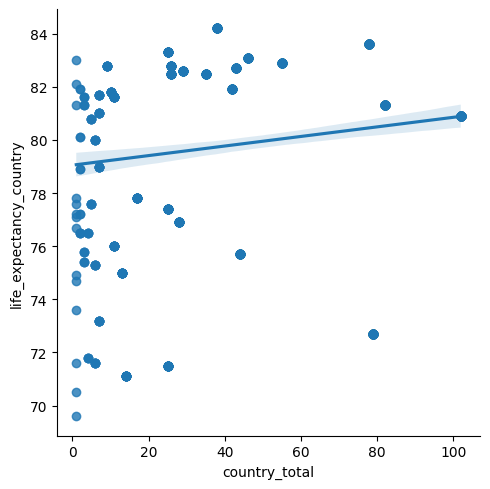

In [60]:
sns.lmplot(x = 'country_total', y = 'life_expectancy_country', data = filtered_df)

### There is a positive correlation between the total number of billionaires in a country and the life expectancy of that country. However, the majority of the datapoints are very far from the regression line.

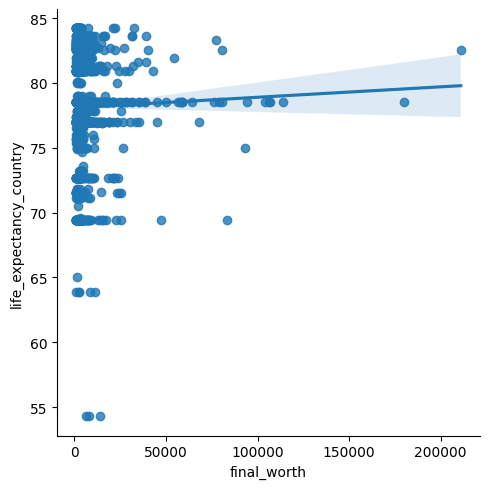

In [61]:
# Life expectancy vs. final worth 

sns.lmplot(x = 'final_worth', y = 'life_expectancy_country', data = df)

In [62]:
# What happens if we remove the 2 outliers for final_worth and 3 outliers for life expectancy?

# Filter the data frame to exclude 'final_worth' numbers over 150000 and 'life_expectancy_country' numbers under 67
filtered_df = df[(df['final_worth'] <= 150000) & (df['life_expectancy_country'] >= 67)]

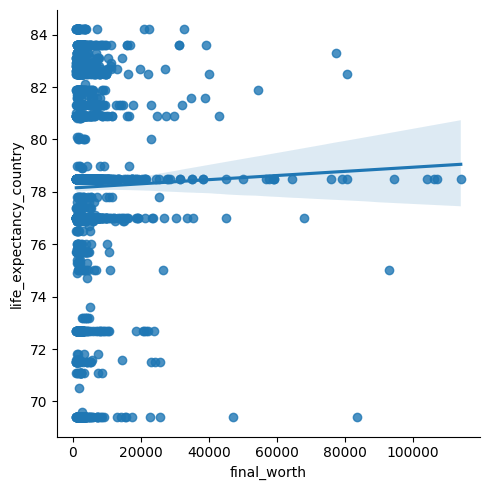

In [63]:
sns.lmplot(x = 'final_worth', y = 'life_expectancy_country', data = filtered_df)

### There is  no significant correlation between the final worth of a billionaire and the life expectancy of the country they live in.

<Axes: xlabel='age', ylabel='age'>

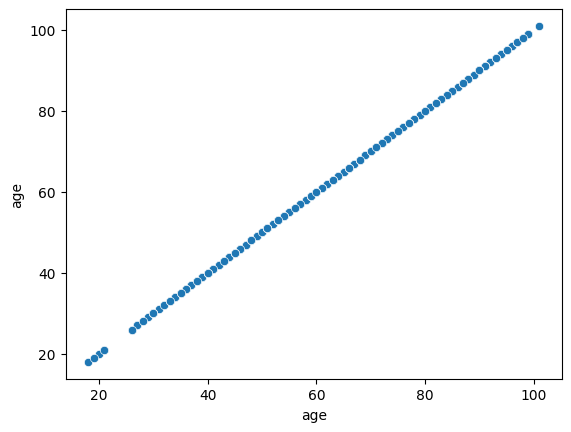

In [64]:
sns.scatterplot(x = 'age', y = 'age', data = df)

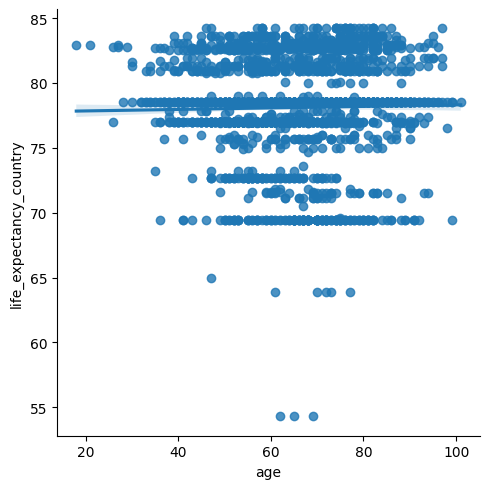

In [65]:
sns.lmplot(x = 'age', y = 'life_expectancy_country', data = df)

In [66]:
# What does this look like if we filter out the lowest life expectancy ages?

# Filter the data frame to exclude 'life_expectancy_country' numbers under 67
filtered_df = df[df['life_expectancy_country'] >= 67]

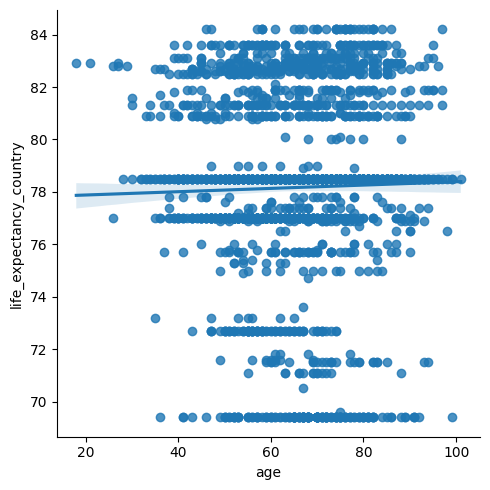

In [67]:
sns.lmplot(x = 'age', y = 'life_expectancy_country', data = filtered_df)

### There is no discernable correlation between the age of a billionaire and the life expectancy in their country. To find any significant connection between these two variables, we'd need historical data of deceased billionaires and how long they lived compared to the life expectancy of thier countries. When dealing with a living data set, nothing of note can be determined with these variables.

<Axes: xlabel='gdp_country', ylabel='gdp_country'>

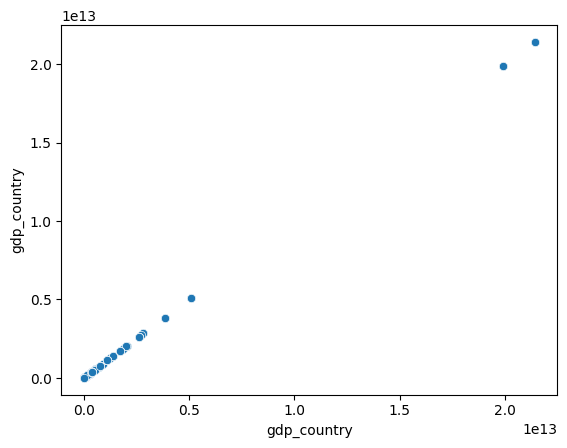

In [6]:
# gdp vs gdp 

sns.scatterplot(x = 'gdp_country', y = 'gdp_country', data = df)

### There are a few countries whose gdp is above 10 trillion. Most are below 6 trillion. I'm going to compare numbers of billionaires in those two groups.

In [7]:
# Create subsets

gdp_large = df[df['gdp_country'] > 10_000_000_000_000]

In [8]:
gdp_small = df[df['gdp_country'] <=10_000_000_000_000]

In [9]:
gdp_large['country'].unique()

array(['United States', 'China'], dtype=object)

In [10]:
gdp_small['country'].unique()

array(['France', 'Mexico', 'India', 'Spain', 'Canada', 'Germany',
       'Switzerland', 'Belgium', 'Austria', 'Japan', 'United Kingdom',
       'Australia', 'Indonesia', 'United Arab Emirates', 'Russia',
       'Chile', 'Monaco', 'Czech Republic', 'Sweden', 'Thailand',
       'Uzbekistan', 'Singapore', 'Nigeria', 'Israel', 'Italy',
       'South Africa', 'Brazil', 'Malaysia', 'South Korea', 'New Zealand',
       'Philippines', 'Norway', 'Egypt', 'Denmark', 'Colombia',
       'Netherlands', 'Poland', 'Ukraine', 'Greece', 'Turkey',
       'Argentina', 'Georgia', 'Portugal', 'Kazakhstan', 'Algeria',
       'Vietnam', 'Latvia', 'Finland', 'Luxembourg', 'Cambodia',
       'Lebanon', 'Oman', 'Cyprus', 'Liechtenstein', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',
       'Bahrain', 'Peru', 'Andorra', 'Armenia'], dtype=object)

In [11]:
gdp_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 2639
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1199 non-null   int64  
 1   rank                     1199 non-null   int64  
 2   final_worth              1199 non-null   int64  
 3   name                     1199 non-null   object 
 4   age                      1169 non-null   float64
 5   country                  1199 non-null   object 
 6   city                     1174 non-null   object 
 7   industries               1199 non-null   object 
 8   citizenship_country      1199 non-null   object 
 9   self_made                1199 non-null   bool   
 10  gender                   1199 non-null   object 
 11  state                    0 non-null      object 
 12  state_region             0 non-null      object 
 13  cpi_country              1179 non-null   float64
 14  cpi_change_country       1179

### There are 1199 billionaires in countries with a small GDP

In [12]:
gdp_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 1 to 2638
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1277 non-null   int64  
 1   rank                     1277 non-null   int64  
 2   final_worth              1277 non-null   int64  
 3   name                     1277 non-null   object 
 4   age                      1258 non-null   float64
 5   country                  1277 non-null   object 
 6   city                     1273 non-null   object 
 7   industries               1277 non-null   object 
 8   citizenship_country      1277 non-null   object 
 9   self_made                1277 non-null   bool   
 10  gender                   1277 non-null   object 
 11  state                    753 non-null    object 
 12  state_region             747 non-null    object 
 13  cpi_country              1277 non-null   float64
 14  cpi_change_country       1277

### There are 1277 billionaires in countries with a large GDP

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2640 non-null   int64  
 1   rank                     2640 non-null   int64  
 2   final_worth              2640 non-null   int64  
 3   name                     2640 non-null   object 
 4   age                      2575 non-null   float64
 5   country                  2602 non-null   object 
 6   city                     2568 non-null   object 
 7   industries               2640 non-null   object 
 8   citizenship_country      2640 non-null   object 
 9   self_made                2640 non-null   bool   
 10  gender                   2640 non-null   object 
 11  state                    753 non-null    object 
 12  state_region             747 non-null    object 
 13  cpi_country              2456 non-null   float64
 14  cpi_change_country      

### There are 2476 non-null records for 'gdp_country'. This the same total as records for the 'gdp_small' and 'gdp_large' data frames combined. 

### There are more billionaires in the two countries with the largest GDP than there are in all other countries combined.

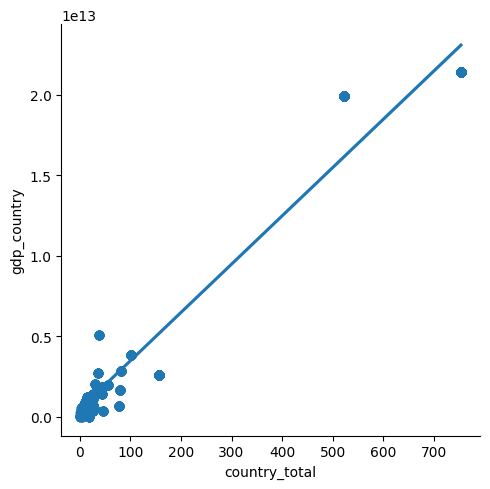

In [76]:
sns.lmplot(x = 'country_total', y = 'gdp_country', data = df)

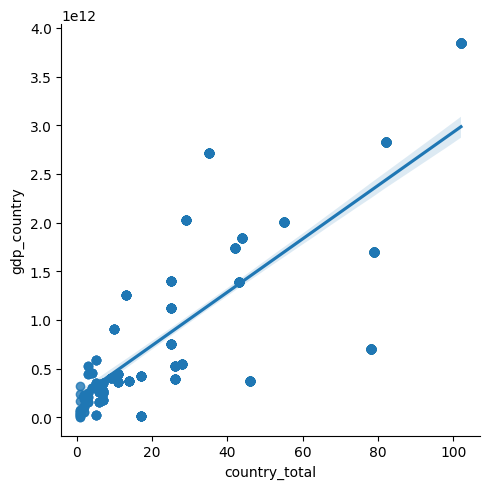

In [77]:
# Let's see how this looks with the three biggest "country_total" outliers excluded and the highest gdp's excluded.

filtered_df = df[(df['country_total'] <140) & (df['gdp_country'] < 4000000000000)]
sns.lmplot(x = 'country_total', y = 'gdp_country', data = filtered_df)

### There is a strong correlation between a country's GDP and it's number of billionaires once a few outliers are removed. However, some of the data points are not very close to the regression line.

In [78]:
# Export data frame

df.to_csv(os.path.join(path, 'Prepared Data', 'billionaires_cleaned.csv'))